Importing the necessary libraries

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# Any results you write to the current directory are saved as output.

In [3]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.24.1


Let's look at the data. 

In [4]:
train=pd.DataFrame(pd.read_csv('./mushrooms.csv'))
train.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Renaming the columns 

In [5]:
train.columns=['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']

Checking for missing values

In [6]:
train.head(5)
train.isna().sum()
#train['stalk-root'].unique()


class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [7]:
train.dtypes

class                       object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

Let's map Categorical variables

In [8]:
mapping=[{'e':1,'p':0},
         {'b':0,'c':1,'x':2,'f':3, 'k':4,'s':5},
         {'f':0,'g':1,'y':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9},
         {'t':1,'f':0},
         {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':0,'p':7,'s':8},
         {'a':0,'d':1, 'f':2, 'n':3},
         {'c':0,'w':1,'d':2},
         {'b':0,'n':1},
         {'k':0,'n':1,'b':2,'h':3,'g':4,'r':5,'o':6,'p':7,'u':8,'e':9,'w':10,'y':11},
         { 'e':0,'t':1},{'b':0,'c':1,'u':2,'e':3,'z':4,'r':5,'?':6},
         {'f':0,'y':1,'k':2,'s':3},
         {'f':0,'y':1,'k':2,'s':3},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':5,'w':6,'y':7},
         {'n':0,'b':1,'c':2,'g':3,'o':4,'p':5,'e':6,'w':7,'y':8},
         {'p':0,'u':1},
         {'n':0,'o':1,'w':2,'y':3},
         {'n':0,'o':1,'t':2},
         {'c':4,'e':1,'f':2,'l':3,'n':0,'p':5,'s':6,'z':7},
         {'k':0,'n':1,'b':2,'h':3,'r':4,'o':5,'u':6,'w':7,'y':8},
         {'a':0,'c':1,'n':2,'s':3,'v':4,'y':5},
         {'g':0,'l':1,'m':2,'p':3,'u':4,'w':5,'d':6}]
len(mapping),len(train.columns)

(23, 23)

In [9]:
for i in range(len(train.columns)):
    train[train.columns[i]]=train[train.columns[i]].map(mapping[i]).astype(int)


Data types have changed from object to int

In [10]:
train.shape

(8124, 23)

Separating depend varible from predictors and splitting the dataset

In [11]:
x=train.iloc[:,1:]
y=train.iloc[:,0]
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

Predictions using Logistic regression

In [12]:
lr=LogisticRegression()
lr.fit(x_tr,y_tr)
accuracy_score(y_ts,lr.predict(x_ts)),confusion_matrix(y_ts,lr.predict(x_ts))

/Users/pf/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9889230769230769, array([[798,  10],
        [  8, 809]]))

Linear SVM

In [14]:
svm = SVC(kernel='linear',random_state=0)
svm.fit(x_tr,y_tr)
ysvc_pred=svm.predict(x_ts)
accuracy_score(y_ts,ysvc_pred),confusion_matrix(y_ts,ysvc_pred)


(0.9932307692307693, array([[805,   3],
        [  8, 809]]))

Kernel SVM

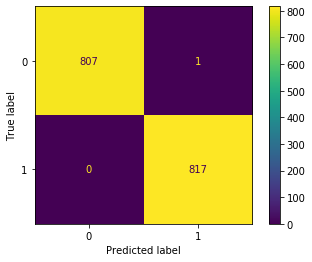

In [26]:
kersvm=SVC(kernel='rbf',random_state=0)
kersvm.fit(x_tr,y_tr)
yksvm_pred=kersvm.predict(x_ts)
accuracy_score(y_ts,yksvm_pred)

cm = confusion_matrix(y_ts,yksvm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Naive Bayes

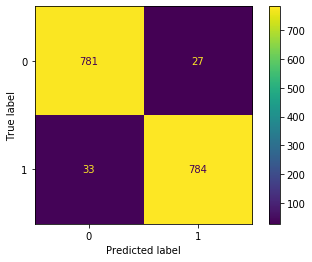

In [27]:
gnb=GaussianNB()
gnb.fit(x_tr,y_tr)
ygnb_pred=gnb.predict(x_ts)
accuracy_score(y_ts,ygnb_pred)
cm = confusion_matrix(y_ts,ygnb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Random Forest

In [18]:
rf=RandomForestClassifier(random_state=0,n_estimators=100)
rf.fit(x_tr,y_tr)
yrf_pred=rf.predict(x_ts)
accuracy_score(y_ts,yrf_pred),confusion_matrix(y_ts,yrf_pred)


(1.0, array([[808,   0],
        [  0, 817]]))

For the task submission , Using ANN

In [19]:
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

epochs = 20

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr,epochs=epochs)



Epoch 1/20
204/204 [==============================] - 0s 794us/step - loss: 0.2259 - accuracy: 0.9140
Epoch 2/20
204/204 [==============================] - 0s 621us/step - loss: 0.0533 - accuracy: 0.9811
Epoch 3/20
204/204 [==============================] - 0s 632us/step - loss: 0.0265 - accuracy: 0.9889
Epoch 4/20
204/204 [==============================] - 0s 650us/step - loss: 0.0159 - accuracy: 0.9954
Epoch 5/20
204/204 [==============================] - 0s 686us/step - loss: 0.0098 - accuracy: 0.9969
Epoch 6/20
204/204 [==============================] - 0s 720us/step - loss: 0.0062 - accuracy: 0.9992
Epoch 7/20
204/204 [==============================] - 0s 639us/step - loss: 0.0043 - accuracy: 0.9997
Epoch 8/20
204/204 [==============================] - 0s 627us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 9/20
204/204 [==============================] - 0s 644us/step - loss: 0.0023 - accuracy: 0.9998
Epoch 10/20
204/204 [==============================] - 0s 649us/step - loss: 0.001

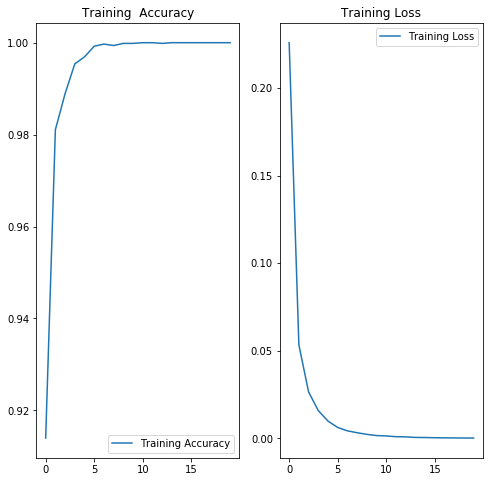

In [20]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

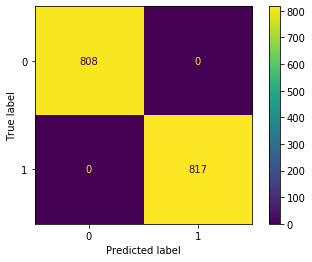

In [25]:
y_pred=model.predict(x_ts)
y_pred=y_pred>0.5

cm = confusion_matrix(y_ts, y_pred)  

disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

The unmaaping can be done in the same using dictonaries . This shows how simple encoding helps model predict give accurate results. If you found this helpful do upvote.  Thanks in advance !. 